# Draw the logs.

### draw the query by gpu utilization and time

In [ ]:
!pip install matplotlib seaborn numpy pandas

In [14]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import numpy as np
import os
from datetime import datetime

In [57]:
def csv_to_json(csv_path):
    if csv_path[-3:] == "csv":
        csv_data = pd.read_csv(csv_path)
        csv_columns = csv_data.columns
        json_data = dict()
        print(csv_data)
        for idx in range(csv_data.shape[0]):
            _json_data = dict()
            data = csv_data.iloc[idx, :]
            for j, item in enumerate(csv_columns):
                _json_data[item] = data.iloc[j]
            json_data[idx] = _json_data
        json_path = csv_path[:-4] + ".json"
        with open(json_path, "w") as f:
            json.dump(json_data, f)
        print("Load data to ",json_path)
    else:
        print("This path is not csv file!")
    
def csv_to_json_dir(csv_dir_path):
    csv_path_list = [os.path.join(csv_dir_path,_) for _ in os.listdir(csv_dir_path)]
    print(csv_path_list)
    for csv_path in csv_path_list:
        csv_to_json(csv_path)


In [ ]:
csv_to_json_dir("./vllm_log")

In [15]:
def plot_json_folder(json_path, x_column, y_column, save=False):
    # json文件位于一个文件夹中
    json_folder = json_path  # 替换为存放JSON文件的文件夹路径
    json_files = [f for f in os.listdir(json_folder) if f.endswith('.json')]

    # 设置子图的布局大小 (比如: 两行两列布局)
    num_files = len(json_files)
    cols = 2  # 每行两个子图
    rows = (num_files // cols) + (num_files % cols)  # 动态计算行数

    fig, axs = plt.subplots(rows, cols, figsize=(12, 8))  # 创建子图框架
    axs = axs.ravel()  # 将子图矩阵转换为可迭代的一维数组

    for i, json_file in enumerate(json_files):
        # 读取每个json文件
        with open(os.path.join(json_folder, json_file), 'r') as f:
            data = json.load(f)

        # 提取record_time 和 GPU_utilization字段
        x = [entry[x_column] for entry in data.values()]
        y = [entry[y_column] for entry in data.values()]

        # 在子图中绘制
        axs[i].bar(x, y, linestyle='-', color='b')
        axs[i].set_title(f'{y_column}: {json_file}')  # 设置子图标题
        axs[i].set_xlabel(f'{x_column}')
        axs[i].set_ylabel(f'{y_column}')
        axs[i].grid(True)
    
    # 调整布局避免重叠
    plt.tight_layout()
    if save:
        now = datetime.now()
        current_time = now.strftime("%Y_%m_%d_%H_%M")
        plt.savefig(f'./{json_path}/{x_column}_{y_column}_{current_time}.png')

In [ ]:
# draw KV cache by vllm logs
plot_json_folder('vllm_log', 'timestamp', 'gpu_kvcache_usage')

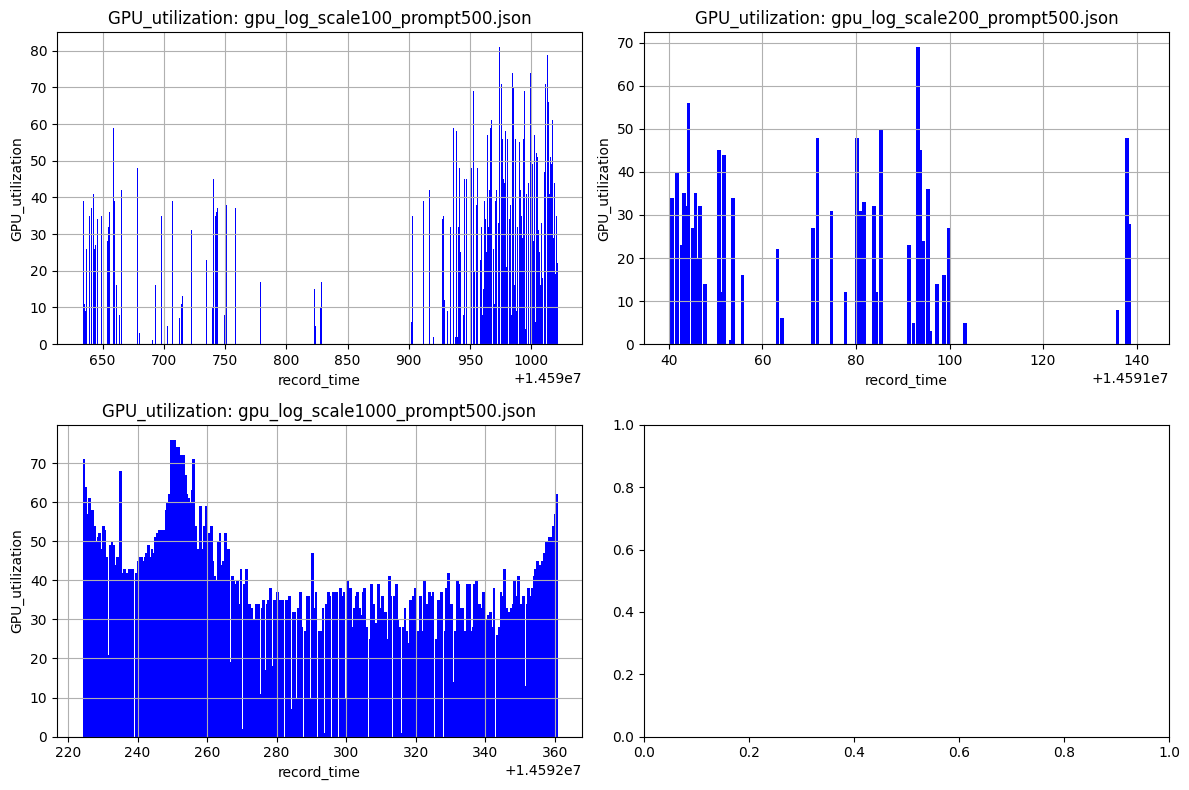

In [20]:
# draw GPU utilization by gpu logs
plot_json_folder('gpu_log', 'record_time', 'GPU_utilization')

In [ ]:
# draw GPU memory by gpu logs
plot_json_folder('gpu_log', 'record_time', 'GPU_used_mem')

In [ ]:
# draw GPU utilization by detail logs
plot_json_folder('detail_log', 'record_time', 'GPU_utilization')

In [ ]:
# draw input length and record time by detail logs
plot_json_folder('detail_log', 'record_time', 'in_len')

In [ ]:
## draw output length and record time by detail logs
plot_json_folder('detail_log', 'record_time', 'out_len')